In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('AmazonSaleReport.csv')

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [ ]:
df.shape

(127752, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127752 entries, 0 to 127751
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               127752 non-null  int64  
 1   Order ID            127752 non-null  object 
 2   Date                127752 non-null  object 
 3   Status              127752 non-null  object 
 4   Fulfilment          127752 non-null  object 
 5   Sales Channel       127752 non-null  object 
 6   ship-service-level  127752 non-null  object 
 7   Category            127752 non-null  object 
 8   Size                127752 non-null  object 
 9   Courier Status      127751 non-null  object 
 10  Qty                 127751 non-null  float64
 11  currency            120035 non-null  object 
 12  Amount              120035 non-null  float64
 13  ship-city           127716 non-null  object 
 14  ship-state          127716 non-null  object 
 15  ship-postal-code    127716 non-nul

In [ ]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,127752.000000,127751.000000,120035.000000,127716.000000,0.0,0.0
mean,63874.126886,0.904423,648.472127,464034.287850,NaN,NaN
std,36879.564622,0.313443,281.311939,191545.245581,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,31936.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,63874.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,95812.250000,1.000000,788.000000,600026.000000,NaN,NaN
max,127750.000000,15.000000,5584.000000,989898.000000,NaN,NaN


In [ ]:
#drop unrelated/blank columns
df.drop(['New','PendingS'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127752 entries, 0 to 127751
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               127752 non-null  int64  
 1   Order ID            127752 non-null  object 
 2   Date                127752 non-null  object 
 3   Status              127752 non-null  object 
 4   Fulfilment          127752 non-null  object 
 5   Sales Channel       127752 non-null  object 
 6   ship-service-level  127752 non-null  object 
 7   Category            127752 non-null  object 
 8   Size                127752 non-null  object 
 9   Courier Status      127751 non-null  object 
 10  Qty                 127751 non-null  float64
 11  currency            120035 non-null  object 
 12  Amount              120035 non-null  float64
 13  ship-city           127716 non-null  object 
 14  ship-state          127716 non-null  object 
 15  ship-postal-code    127716 non-nul

In [ ]:
# checking null value
pd.isnull(df)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127747,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
127748,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
127749,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
127750,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [ ]:
# sum will give total values of null values
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            1
Qty                       1
currency               7717
Amount                 7717
ship-city                36
ship-state               36
ship-postal-code         36
ship-country             36
B2B                       1
fulfilled-by          88799
dtype: int64

In [ ]:
# change data type
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [ ]:
#checking whether the  data type change or not
df['ship-postal-code'].dtype

dtype('int64')

In [ ]:
df.shape

(127752, 19)

In [ ]:
#drop null values
df.dropna(inplace=True)

In [ ]:
df.shape

(37217, 19)

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
df.rename(columns={'Qty':"Quantity"})

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0.0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1.0,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
12,12,405-5513694-8146768,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1.0,INR,399.00,Amravati.,MAHARASHTRA,444606.0,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127724,127723,403-7193199-7435523,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,1.0,INR,524.00,BENGALURU,KARNATAKA,560054.0,IN,False,Easy Ship
127725,127724,403-7193199-7435523,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,M,Shipped,1.0,INR,487.00,BENGALURU,KARNATAKA,560054.0,IN,False,Easy Ship
127727,127726,407-4646255-4089117,06-01-2022,Cancelled,Merchant,Amazon.in,Standard,T-shirt,M,On the Way,0.0,INR,760.95,JORHAT,ASSAM,785001.0,IN,False,Easy Ship
127733,127732,403-6586898-9989905,06-01-2022,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,XS,Shipped,1.0,INR,967.00,Renigunta,ANDHRA PRADESH,517520.0,IN,False,Easy Ship


In [ ]:
df.describe(include=object)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,B2B,fulfilled-by
count,37217,37217,37217,37217,37217,37217,37217,37217,37217,37217,37217,37217,37217,37217,37217
unique,34382,91,11,1,1,1,8,11,3,1,4683,58,1,2,1
top,171-5057375-2831560,04-25-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,False,Easy Ship
freq,12,697,28501,37217,37217,37217,13963,6764,31601,37217,2802,6176,37217,36932,37217


In [ ]:
#use describe() for specific columns
df[['Qty','Amount']].describe()

,Qty,Amount
count,37217.000000,37217.000000
mean,0.867346,646.287040
std,0.354240,280.095357
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,627.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# Exploratory Data Analysis

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

# Size

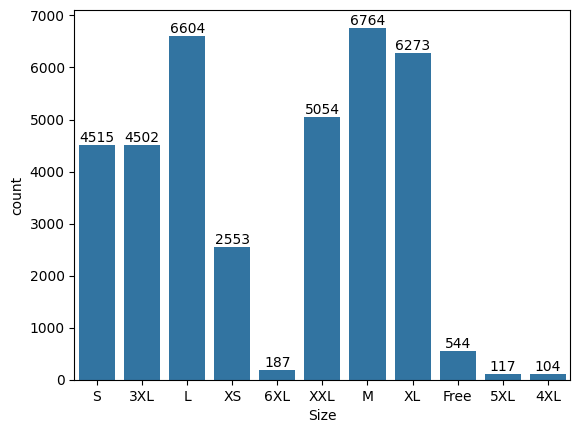

In [ ]:
colors = sns.color_palette('pastel')

ax = sns.countplot(x='Size', data=df)

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

**Note:From the Above Graph it shows that mostly people buy M-Size**

In [ ]:
gb_size = df.groupby(['Size'], as_index=False)['Qty'].sum().sort_values(by='Qty', ascending=False)
gb_size

,Size,Qty
6,M,5867.0
5,L,5758.0
8,XL,5440.0
10,XXL,4431.0
0,3XL,3941.0
7,S,3857.0
9,XS,2161.0
4,Free,462.0
3,6XL,168.0
2,5XL,102.0


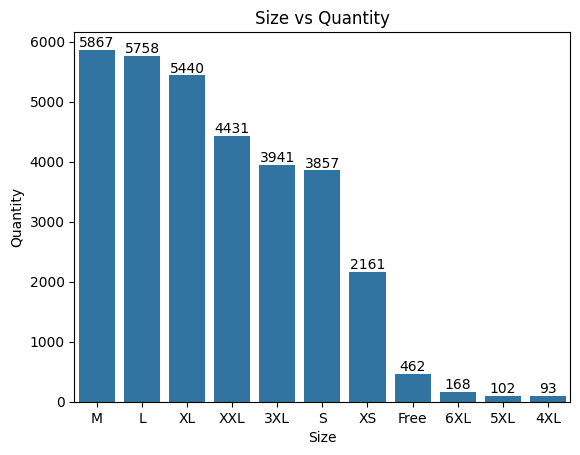

In [ ]:
ax = sns.barplot(x='Size', y='Qty', data=gb_size)

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Size')
plt.ylabel('Quantity')
plt.title('Size vs Quantity')
plt.show()

***From above Graph it shows that most of the Qty buys M-size in sales***


# Courier Status

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

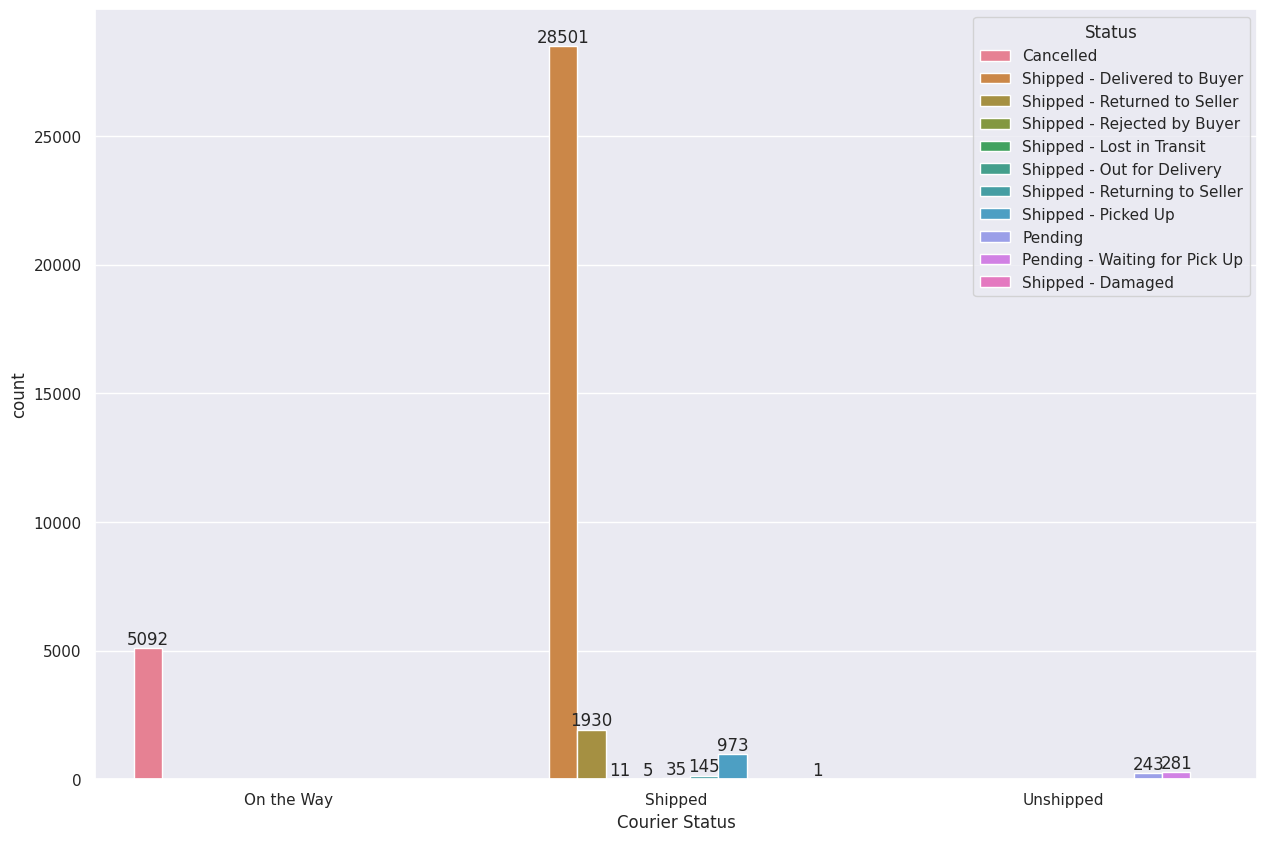

In [ ]:
sns.set(rc={"figure.figsize":(15,10)})
ax = sns.countplot(x='Courier Status', data=df,hue = "Status")

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

***Note: From above Graph the majority of the orders are shipped through the courier.***

# Histogram Plot

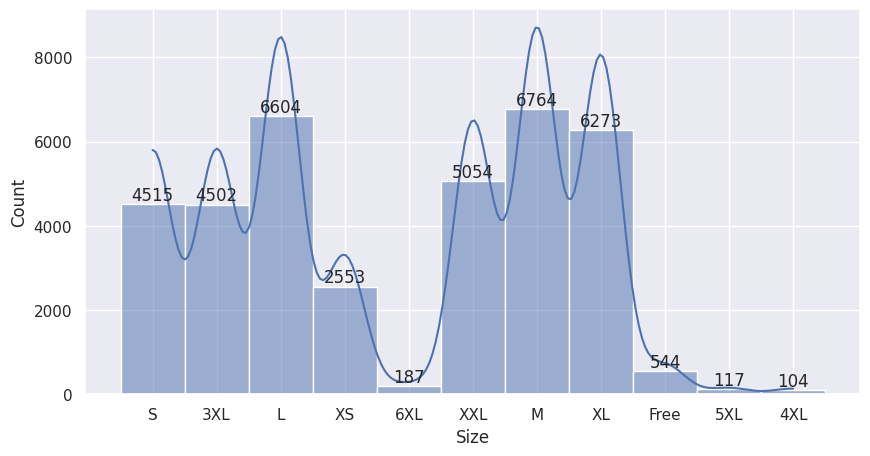

In [ ]:
from re import A
sns.set(rc={"figure.figsize":(10,5)})
ax = sns.histplot(df['Size'], kde=True)

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()
# df["Size"].hist()

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [ ]:
df["Category"].info()

<class 'pandas.core.series.Series'>
Index: 37217 entries, 0 to 127742
Series name: Category
Non-Null Count  Dtype 
--------------  ----- 
37217 non-null  object
dtypes: object(1)
memory usage: 1.6+ MB


In [ ]:
df['Category'] = df['Category'].astype('str')

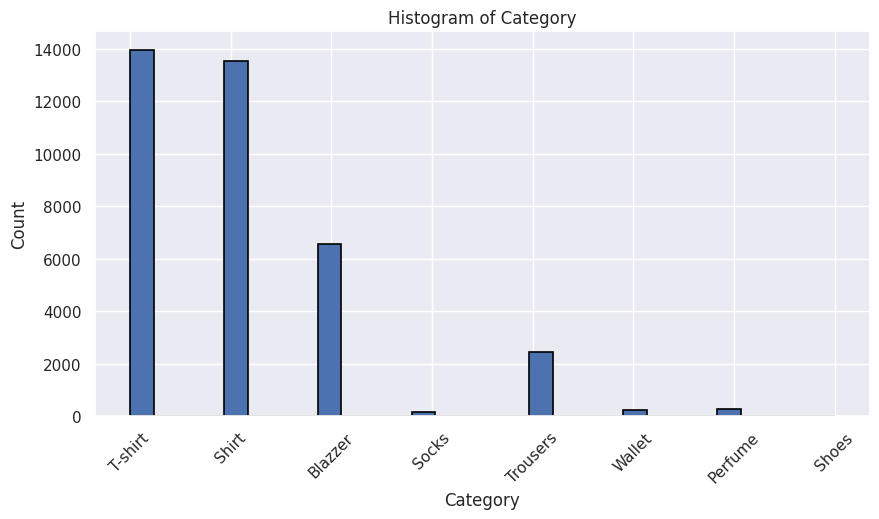

In [ ]:
column_data = df['Category']
plt.hist(column_data, bins=30 ,edgecolor='black', linewidth=1.2)
plt.xticks(rotation = 45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Histogram of Category')
plt.show()

***From the above graph it show that the most of the buyers are of T-shirts***

In [ ]:
# Checking B2B Data  by using pie chart
B2B_Check = df['B2B'].value_counts()
B2B_Check

B2B
False    36932
True       285
Name: count, dtype: int64

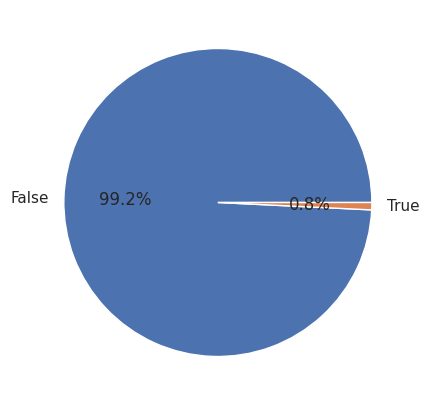

In [ ]:
plt.pie(B2B_Check, labels=B2B_Check.index, autopct='%1.1f%%')
plt.show()

***From the above Chart we can see that maximum (i.e., 99.2%) of the buyers are retailers and 0.8% are B2B Buyers***

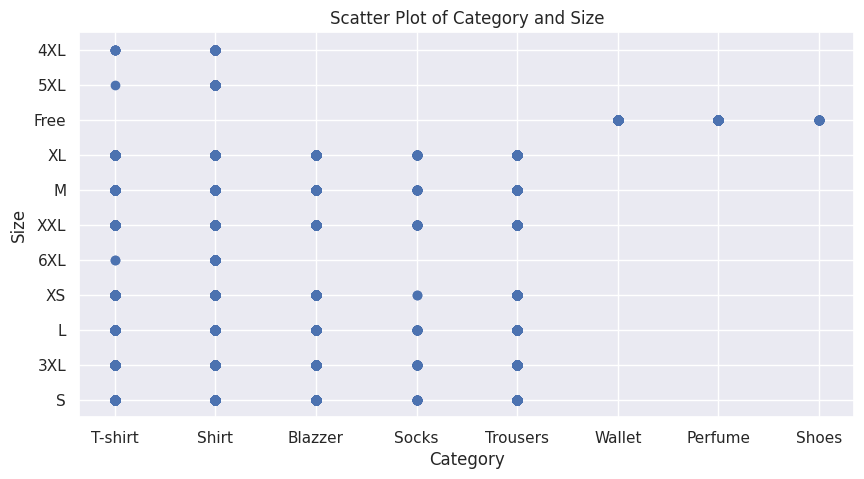

In [ ]:
x_data = df["Category"]
y_data = df["Size"]

plt.scatter(x_data, y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter Plot of Category and Size')
plt.show()

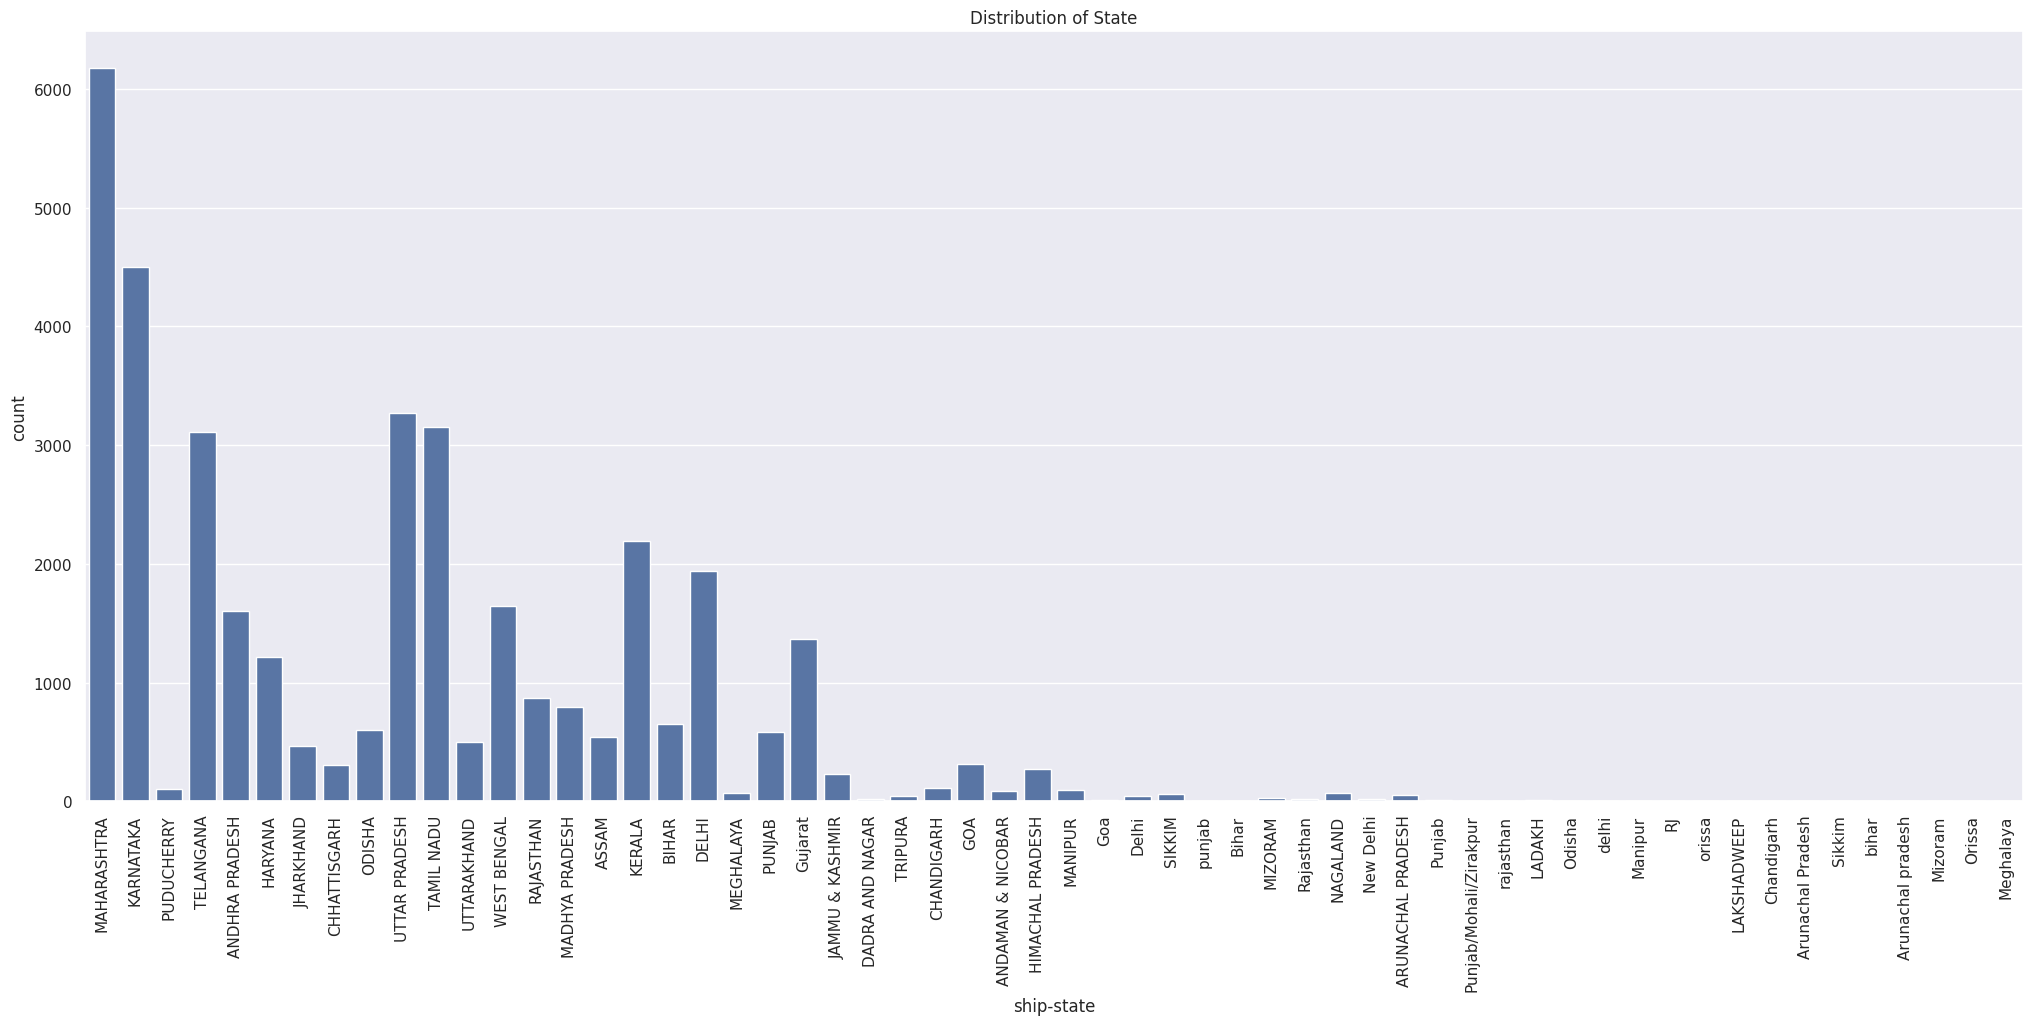

In [ ]:
# Plot count of cities by state
sns.set(rc={"figure.figsize":(25,10)})
sns.countplot(data=df, x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()


In [ ]:
top_10_state = df["ship-state"].value_counts().head(10)
top_10_state

ship-state
MAHARASHTRA       6176
KARNATAKA         4503
UTTAR PRADESH     3267
TAMIL NADU        3153
TELANGANA         3112
KERALA            2191
DELHI             1942
WEST BENGAL       1646
ANDHRA PRADESH    1602
Gujarat           1369
Name: count, dtype: int64

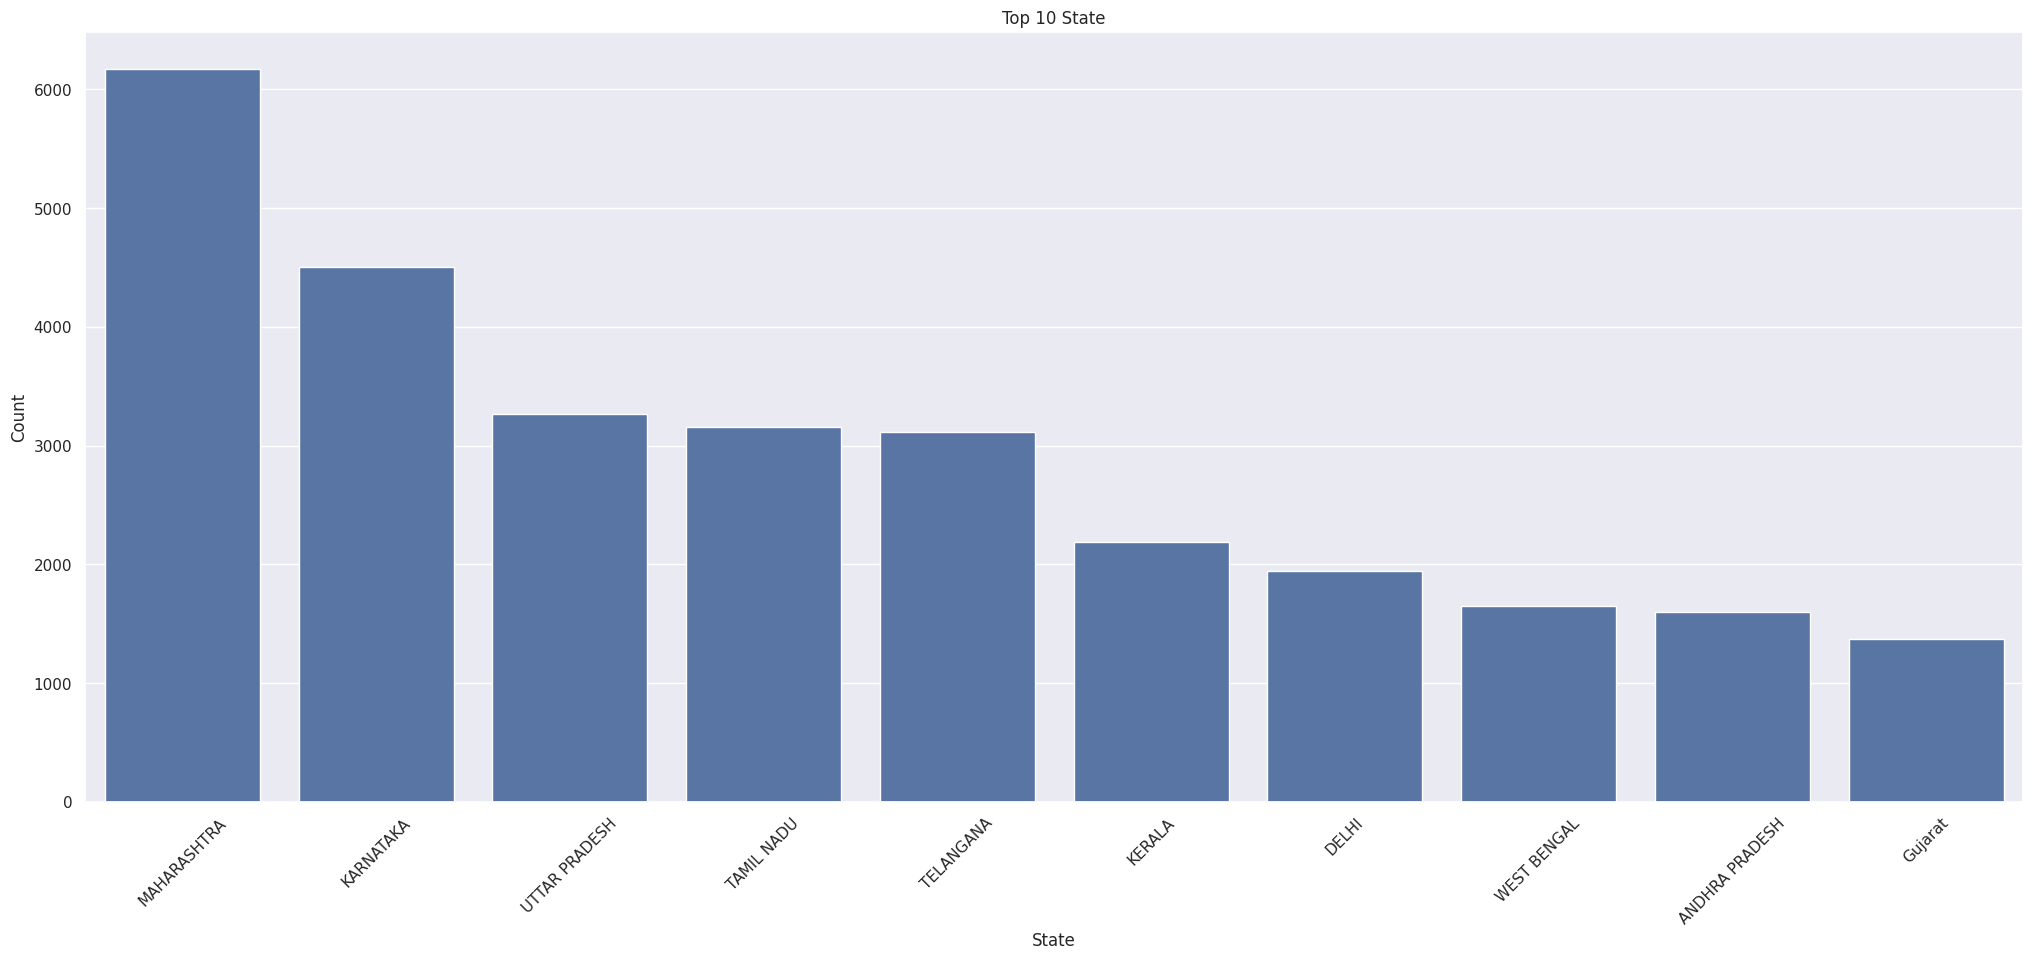

In [ ]:
sns.barplot(x=top_10_state.index, y=top_10_state.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Top 10 State')
plt.xticks(rotation=45)
plt.show()

***Note: From above Graph you can see that most of the buyers are Maharashtra state***


# Conclusion:


The data analysis reveals that the business has a significant customer base in Maharashtra state, mainly serves retailers, fulfills orders through Amazon, experiences high demand for T-shirts, and sees M-Size as the preferred choice among buyers.